In [ ]:
#let us first import all the necessary libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore") #Ignore all the warnings

In [ ]:
pd.set_option("Display.max_rows",200)       #Increasing the visibility of Max No. of Rows to 200
pd.set_option("Display.max_columns",200)    #Increasing the visibility of Max No. of Columns to 200
pd.set_option("Display.width",1000)         #Width of the Cell

##A peep into the datasets

Before we jump into action, let us have a look in the datasets.

In [ ]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

Let us see the dimensions of the datasets


In [ ]:
print(f"customers:{customers.shape}")
print(f"products:{products.shape}")
print(f"transactions:{transactions.shape}")

customers:(200, 4)
products:(100, 4)
transactions:(1000, 7)


Let us have a glance at each of the datasets

In [ ]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [ ]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [ ]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


Let us find out the data types of each of the columns to see if some modifications need to be done for the analysis

In [ ]:
customers.dtypes

,0
CustomerID,object
CustomerName,object
Region,object
SignupDate,object


In [ ]:
products.dtypes

,0
ProductID,object
ProductName,object
Category,object
Price,float64


In [ ]:
transactions.dtypes

,0
TransactionID,object
CustomerID,object
ProductID,object
TransactionDate,object
Quantity,int64
TotalValue,float64
Price,float64


##Data Pre-processing

Let us check if there are any duplicate rows in each of the datasets

In [ ]:
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

0
0
0


Let us now check for the presence of null values

In [ ]:
#a function for finding the percentage of null values in each column in the given dataset
def dataset_null_values(df):
    return (df.isnull().sum()*100/len(df)).sort_values(ascending = False)

print(dataset_null_values(customers))
print(dataset_null_values(products))
print(dataset_null_values(transactions))

CustomerID      0.0
CustomerName    0.0
Region          0.0
SignupDate      0.0
dtype: float64
ProductID      0.0
ProductName    0.0
Category       0.0
Price          0.0
dtype: float64
TransactionID      0.0
CustomerID         0.0
ProductID          0.0
TransactionDate    0.0
Quantity           0.0
TotalValue         0.0
Price              0.0
dtype: float64


Since none of the three datasets contain duplicate rows or null values in any of the columns, there is no need for data imputation.

Hence, let us merge the three datasets

In [ ]:
#first, let us merge cutomers and transactions and then with products
cus_trs = pd.merge(left=customers, right=transactions, how = "inner", on = 'CustomerID')
merged_data = pd.merge(cus_trs, products, how="inner", on=['ProductID', 'Price'])

merged_data.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,2024-01-19 03:12:55,2,114.60,57.30,SoundWave Cookbook,Books
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,2024-09-17 09:01:18,3,412.62,137.54,HomeSense Wall Art,Home Decor
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,2024-04-08 00:01:00,2,614.94,307.47,SoundWave Headphones,Electronics
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,2024-05-07 03:11:44,2,911.44,455.72,ActiveWear Smartwatch,Electronics
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,2024-11-02 17:04:16,3,1300.92,433.64,TechPro Headphones,Electronics


Let us check if the merger happened well

In [ ]:
merged_data.shape

(1000, 12)

# Uni-variate Analysis

## Region-based Analysis

Let us see which region is contributing more to the sales

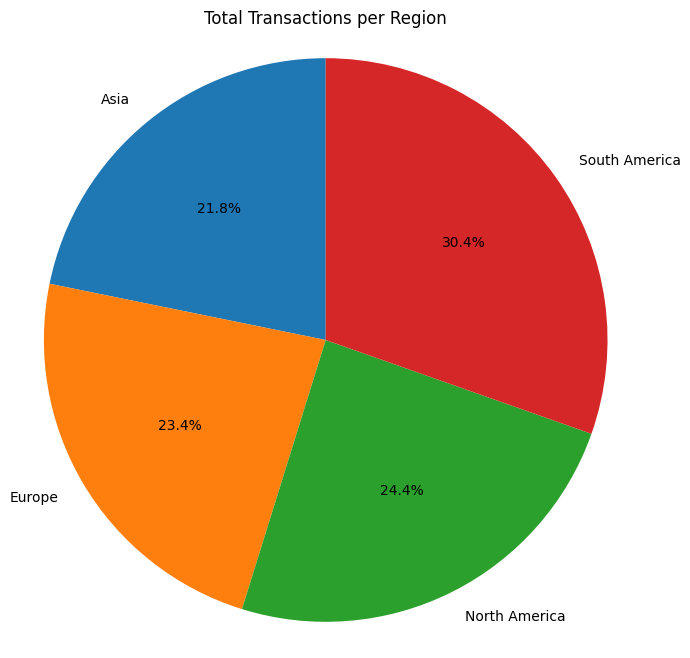

In [40]:
# group data by region and calculate total transactions and total value
region_summary = merged_data.groupby('Region').agg(
    Total_Transactions=('TransactionID', 'count'),
    Total_Value=('TotalValue', 'sum')
)

# create a pie chart for total transactions
plt.figure(figsize=(8, 8))
plt.pie(region_summary['Total_Transactions'], labels=region_summary.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Transactions per Region')
plt.axis('equal')
plt.show()

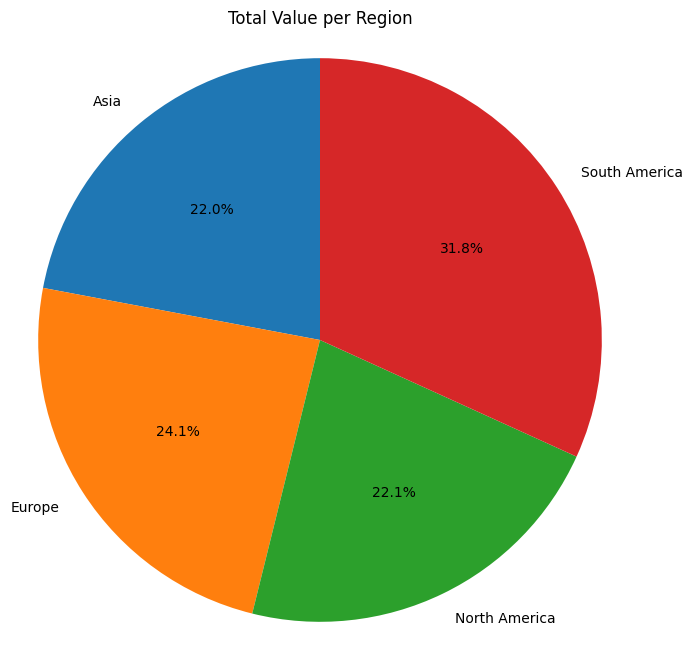

In [41]:
# create a pie chart for total value
plt.figure(figsize=(8, 8))
plt.pie(region_summary['Total_Value'], labels=region_summary.index, autopct='%1.1f%%', startangle=90)
plt.title('Total Value per Region')
plt.axis('equal')
plt.show()

Let us understand the distribution of product price categories across different regions.

By visualizing how products of varying price ranges (e.g., Very Low, Low, Medium, High, Very High) are purchased in each region, we can understand the regional price sensitivity.

Let us identify the region with the highest and lowest number of transactions. This analysis provides insights into regional performance.

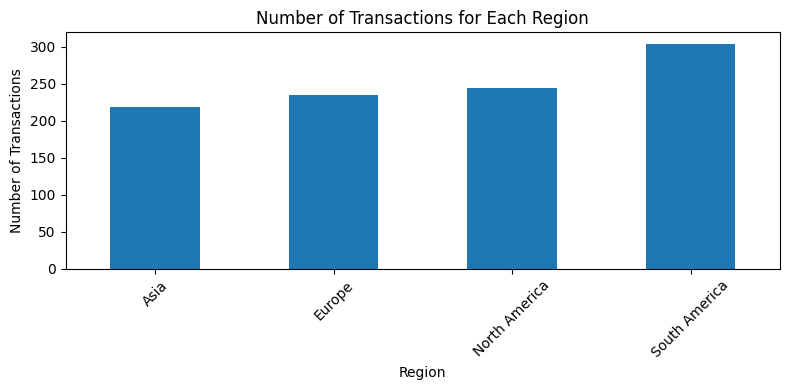

In [ ]:
merged_data.groupby('Region')['TransactionID'].count().plot(
    kind='bar',
    figsize=(8,4),
    title='Number of Transactions for Each Region'
)
plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Let us identify the region with the highest and lowest amount of revenue contributed.

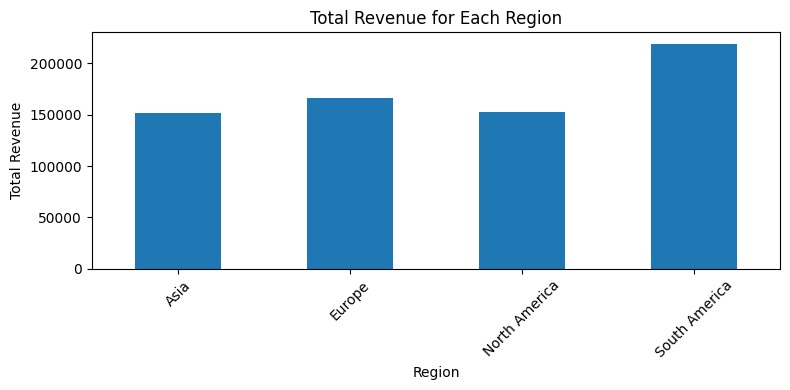

In [ ]:
merged_data.groupby('Region')['TotalValue'].sum().plot(
    kind='bar',
    figsize=(8,4),
    title='Total Revenue for Each Region'
)

plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

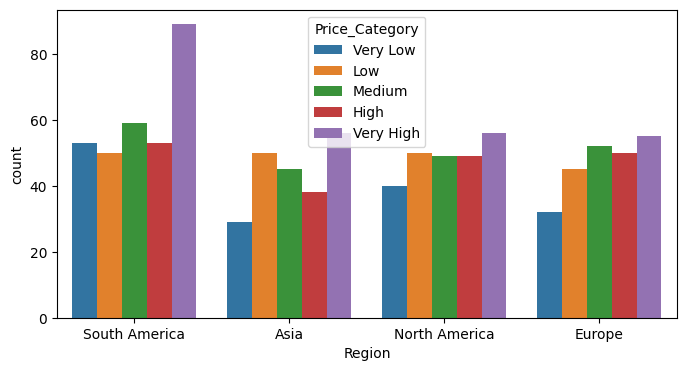

In [42]:
plt.figure(figsize=[8, 4])
merged_data['Price_Category'] = pd.cut(merged_data['Price'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
ax = sns.countplot(x="Region", hue="Price_Category", data=merged_data)
plt.yticks(fontsize=10)
plt.show()

## Product Category-based Analysis

Let us see which category of products has the highest number of products and also see how it contributes to the sales.

Text(0, 0.5, 'Count')

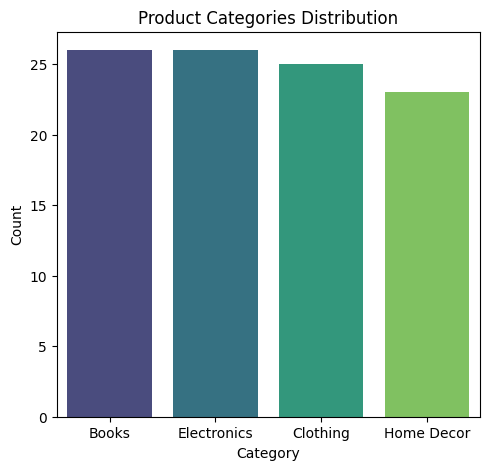

In [36]:
# unique counts per category in Products
product_categories = products['Category'].value_counts()

# plotting the distribution of product categories transactions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=product_categories.index, y=product_categories.values, palette="viridis")
plt.title('Product Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

Let us determine which product category contributes the most to the number of transactions and also revenue. This will help identify the most popular product categories, enabling businesses to focus on high-performing categories and address gaps in lower-performing ones.

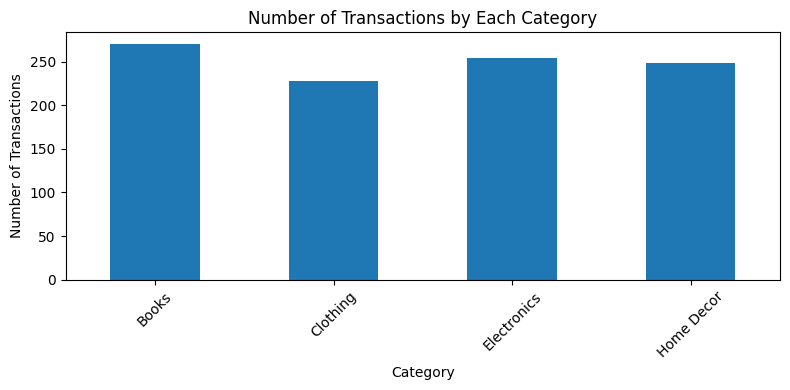

In [ ]:
merged_data.groupby('Category')['TransactionID'].count().plot(
    kind='bar',
    figsize=(8,4),
    title='Number of Transactions by Each Category'
)

plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

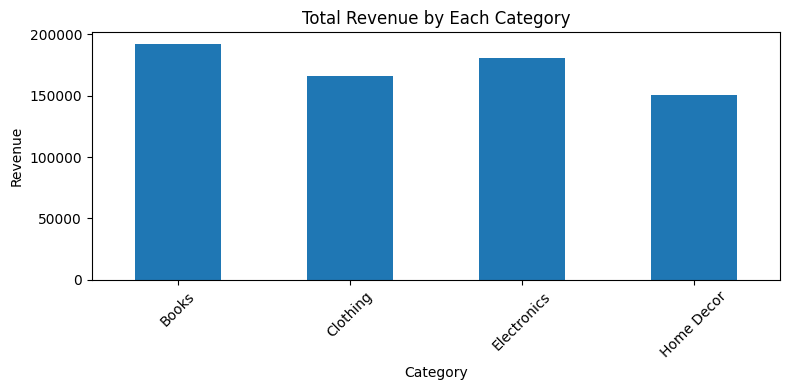

In [ ]:
merged_data.groupby('Category')['TotalValue'].sum().plot(
    kind='bar',
    figsize=(8,4),
    title='Total Revenue by Each Category'
)

plt.xlabel('Category')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bi-variate Analysis

## Product-wise Analysis

Let us see how product-wise breakup of the number of transactions and revenue. This helps us identify the products that are contributing more to the company's revenue.

In [ ]:
print(merged_data.groupby(['Category','ProductName'])['TransactionID'].count())

Category     ProductName                    
Books        ActiveWear Biography                8
             ActiveWear Cookbook                 9
             ActiveWear Textbook                23
             BookWorld Biography                30
             BookWorld Cookbook                 20
             ComfortLiving Biography            20
             ComfortLiving Mystery Book          7
             HomeSense Novel                    16
             SoundWave Cookbook                 29
             SoundWave Mystery Book             17
             SoundWave Novel                    20
             SoundWave Textbook                 11
             TechPro Cookbook                   15
             TechPro Novel                      20
             TechPro Textbook                   25
Clothing     ActiveWear Jacket                  26
             ActiveWear Jeans                   10
             ActiveWear Running Shoes           13
             ActiveWear T-Shirt      

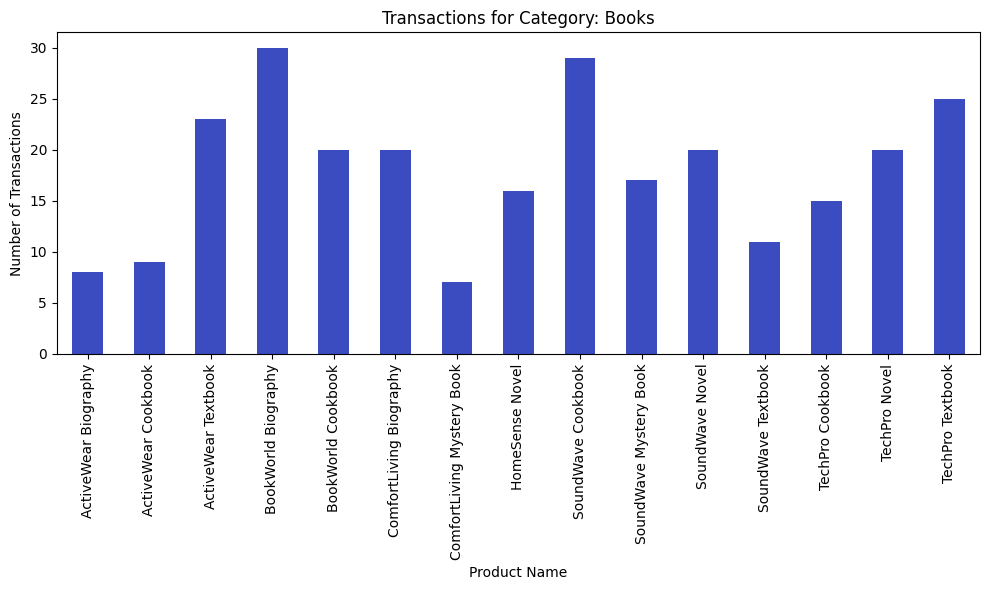

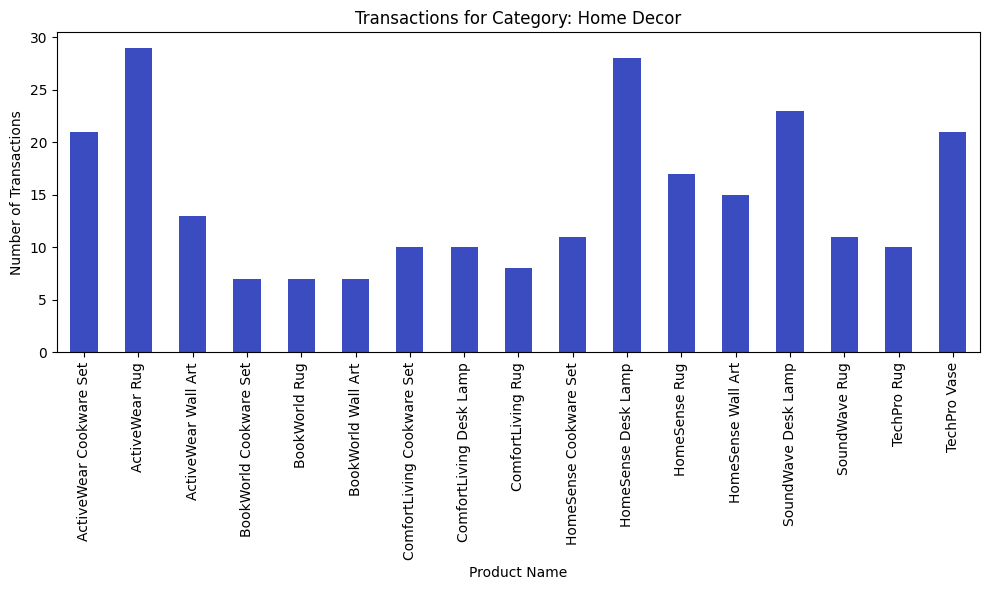

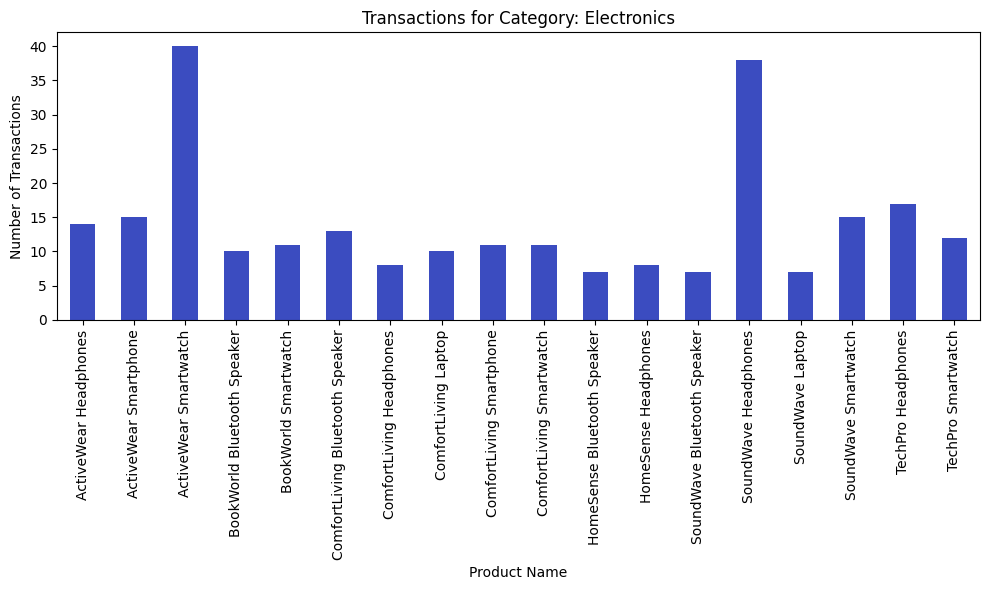

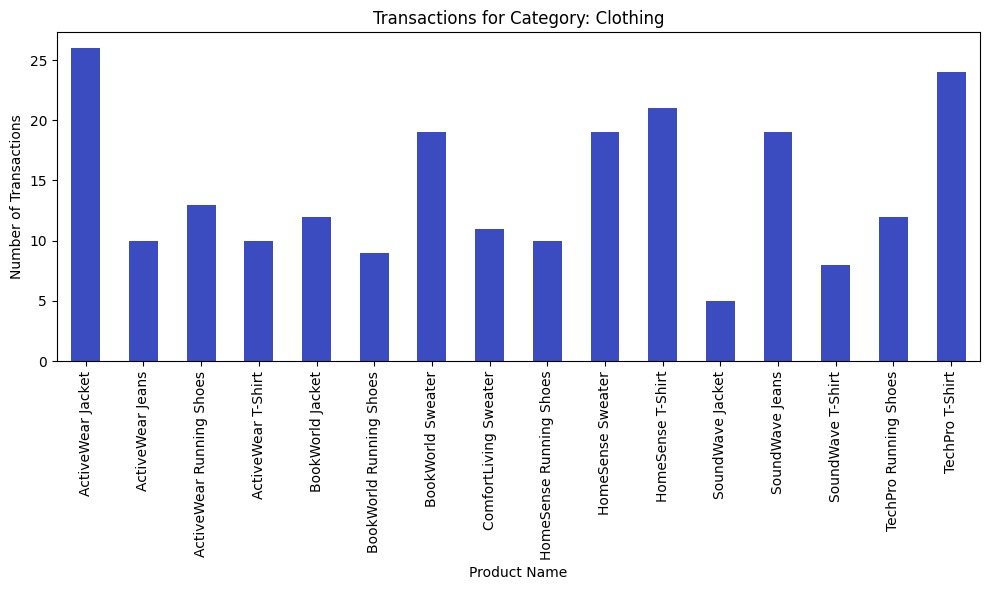

In [ ]:
import matplotlib.pyplot as plt

for category in merged_data['Category'].unique():
    # filter data for the current category
    category_data = merged_data[merged_data['Category'] == category]

    # group by ProductName and count TransactionID for this category
    plot_data = category_data.groupby(['ProductName'])['TransactionID'].count()

    plot_data.plot(
        kind='bar',
        figsize=(10, 6),
        title=f'Transactions for Category: {category}',
        colormap='coolwarm'
    )

    plt.xlabel('Product Name')
    plt.ylabel('Number of Transactions')
    plt.tight_layout()
    plt.show()

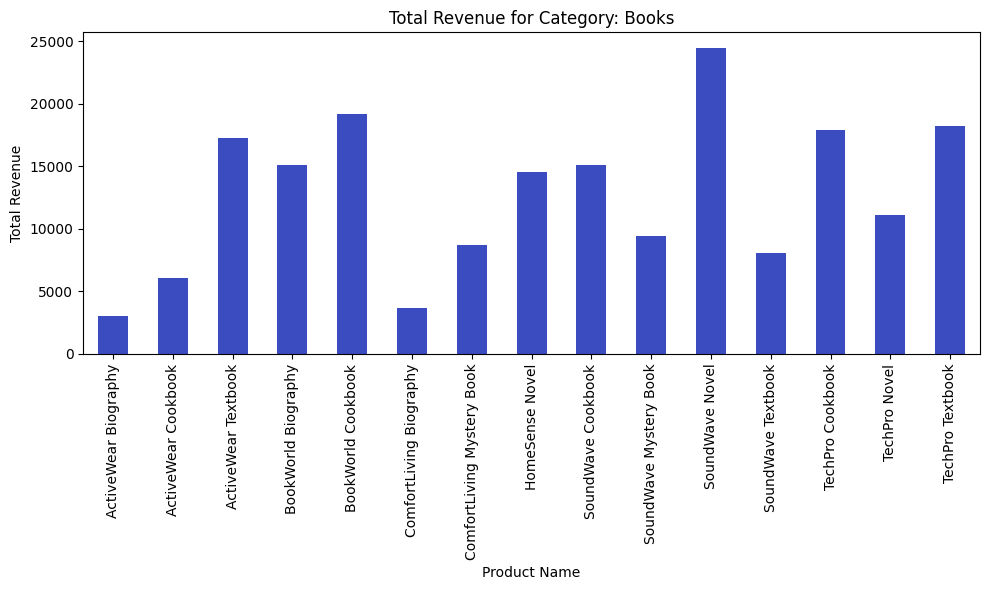

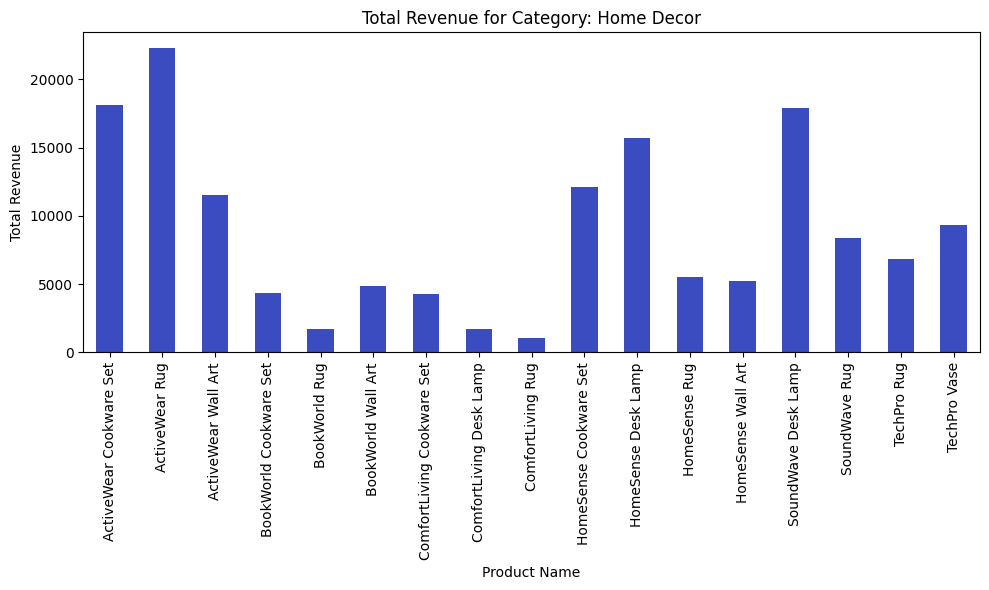

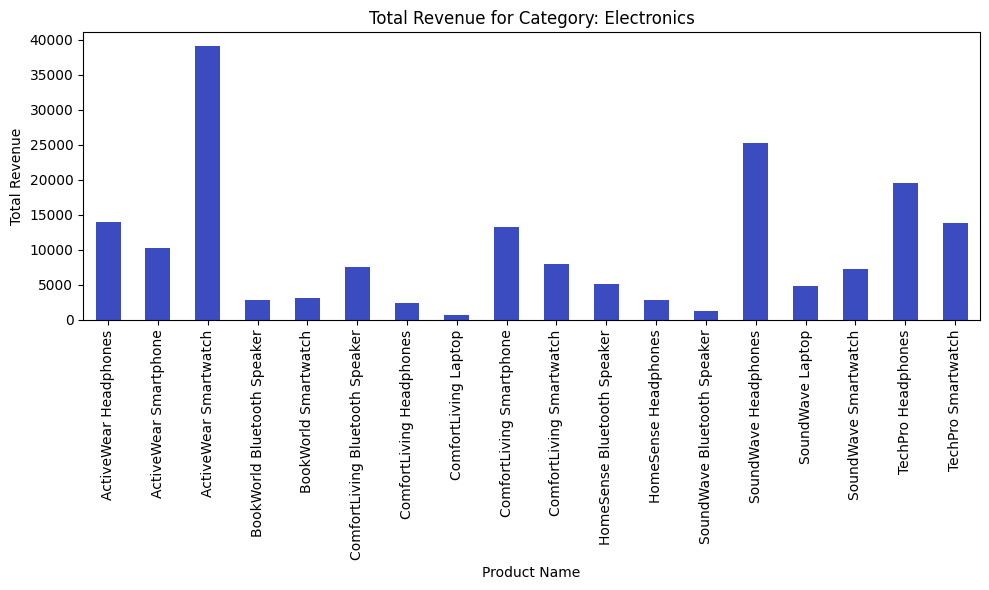

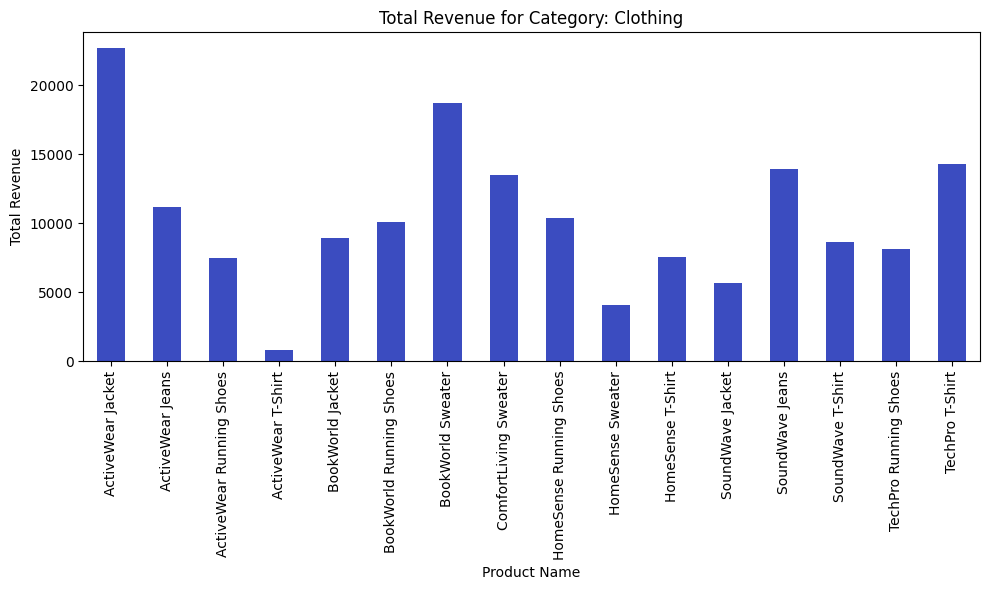

In [ ]:
import matplotlib.pyplot as plt

for category in merged_data['Category'].unique():
    category_data = merged_data[merged_data['Category'] == category]
    plot_data = category_data.groupby(['ProductName'])['TotalValue'].sum()

    plot_data.plot(
        kind='bar',
        figsize=(10, 6),
        title=f'Total Revenue for Category: {category}',
        colormap='coolwarm'
    )

    plt.xlabel('Product Name')
    plt.ylabel('Total Revenue')
    plt.tight_layout()
    plt.show()

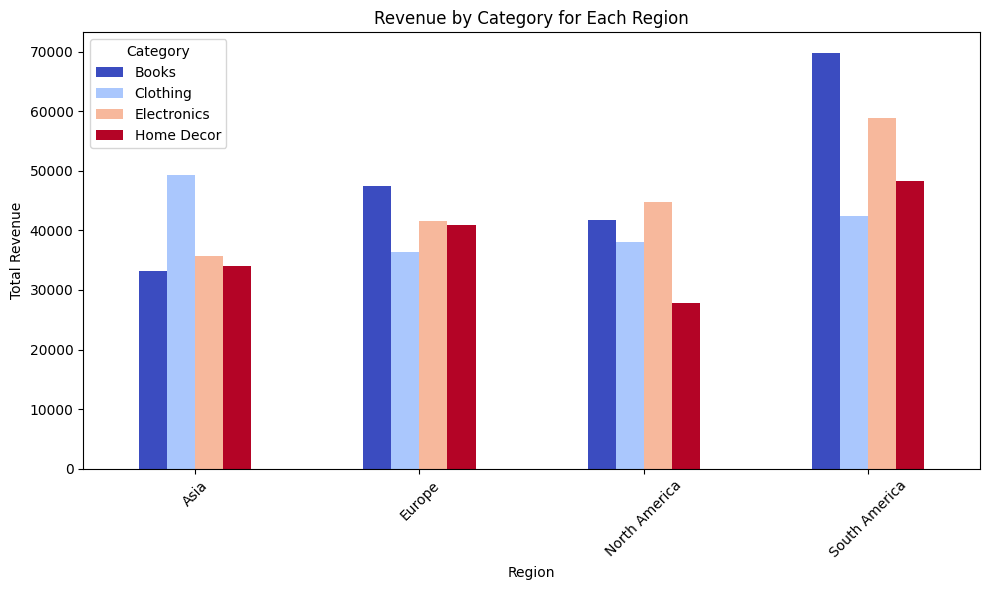

In [ ]:
merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().unstack().plot(
    kind='bar',
    figsize=(10, 6),
    title='Revenue by Category for Each Region',
    colormap='coolwarm'
)
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

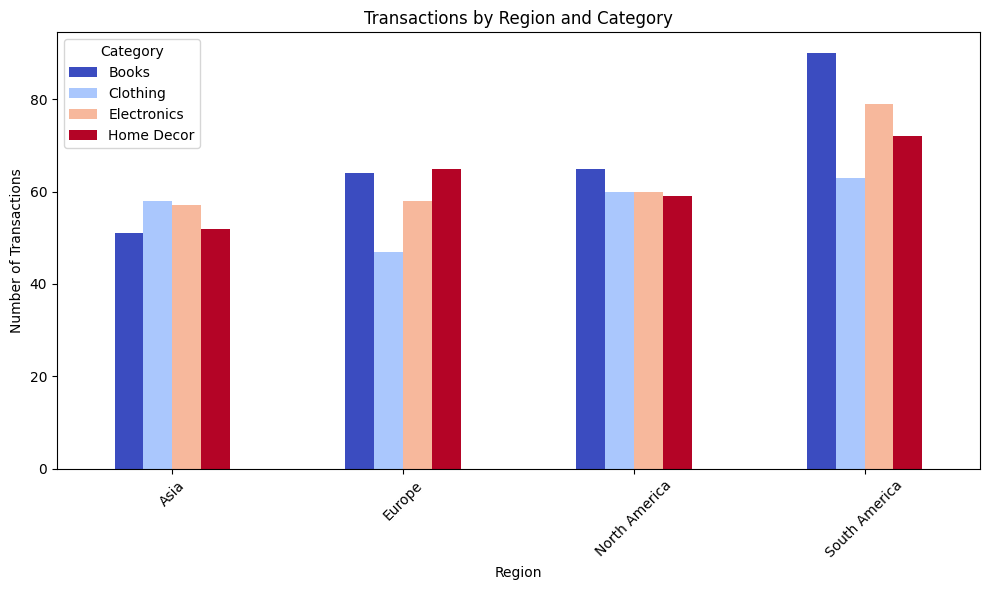

In [ ]:
merged_data.groupby(['Region', 'Category'])['TransactionID'].count().unstack().plot(
    kind='bar',
    figsize=(10, 6),
    title='Transactions by Region and Category',
    colormap='coolwarm'
)

plt.xlabel('Region')
plt.ylabel('Number of Transactions')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Analysis based on transaction time

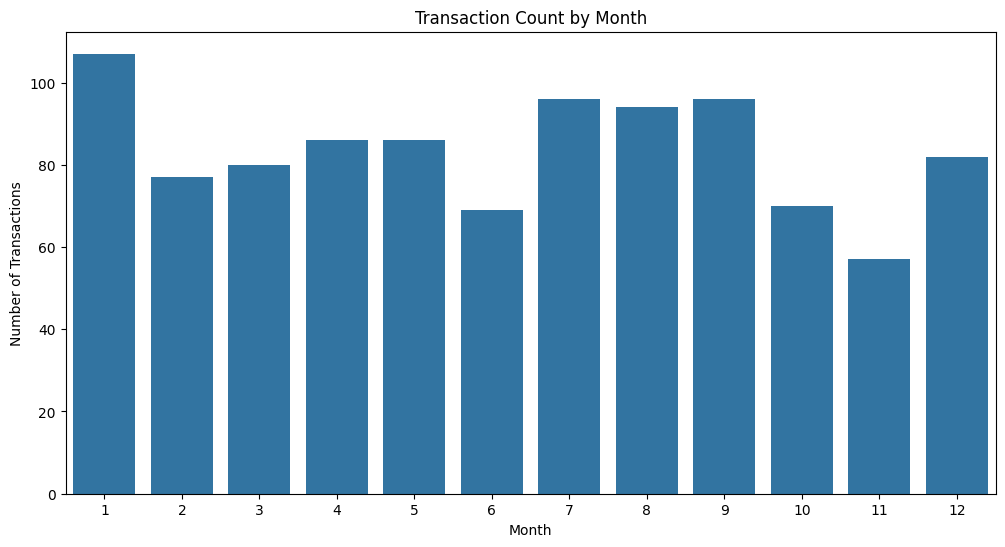

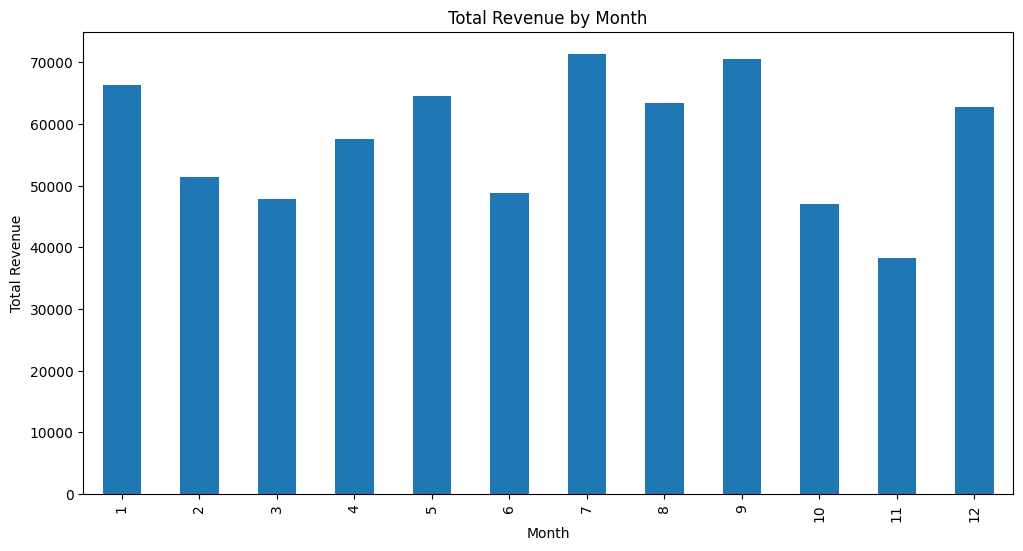

In [ ]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])

merged_data['Year'] = merged_data['TransactionDate'].dt.year
merged_data['Month'] = merged_data['TransactionDate'].dt.month

plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=merged_data)
plt.title('Transaction Count by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

plt.figure(figsize=(12, 6))
merged_data.groupby('Month')['TotalValue'].sum().plot(kind='bar')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

#we can further analyse based on week and day,but counldn't find anything interesting in that

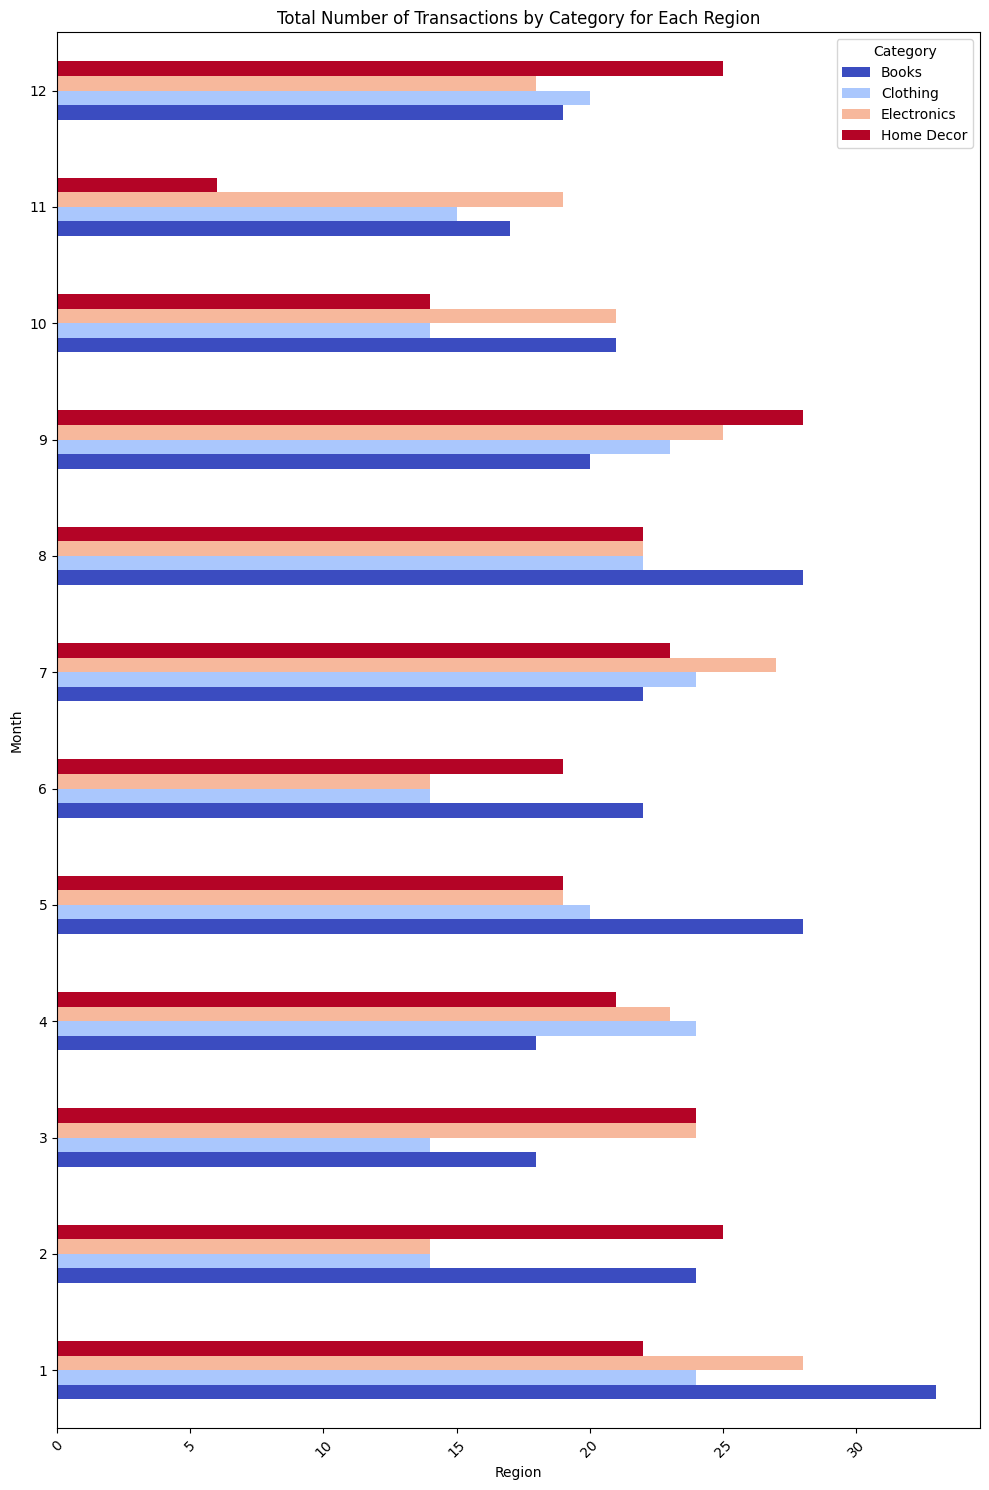

In [43]:
merged_data.groupby(['Month', 'Category'])['TransactionID'].count().unstack().plot(
    kind='barh',
    figsize=(10, 15),
    title='Total Number of Transactions by Category for Each Region',
    colormap='coolwarm'
)
plt.xlabel('Region')
plt.ylabel('Month')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

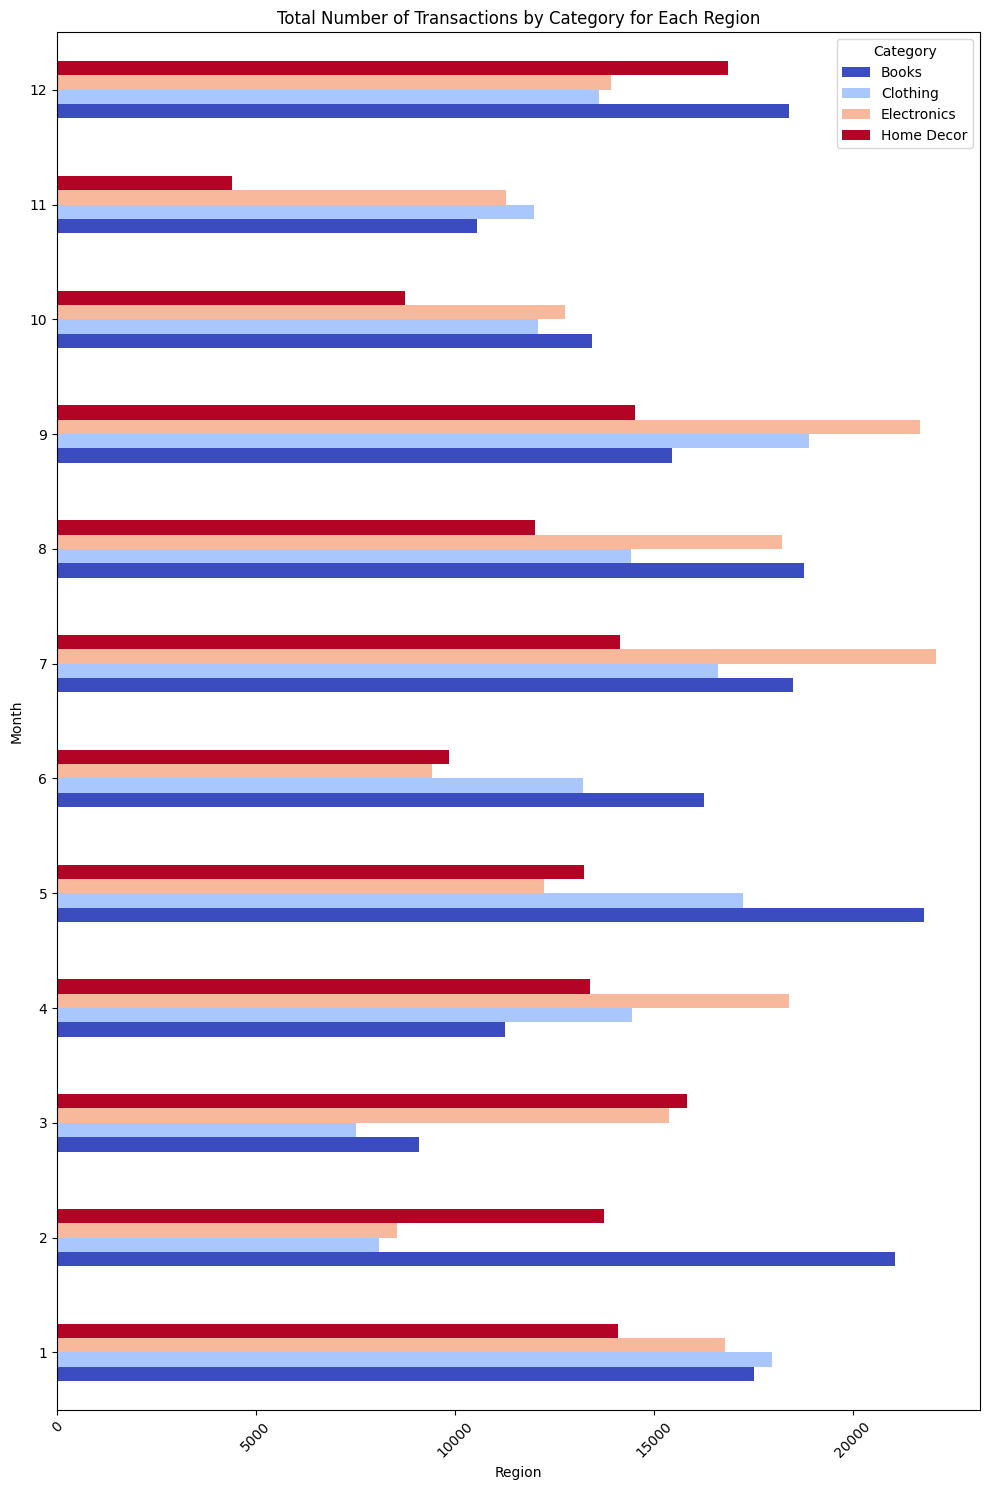

In [44]:
merged_data.groupby(['Month', 'Category'])['TotalValue'].sum().unstack().plot(
    kind='barh',
    figsize=(10, 15),
    title='Total Number of Transactions by Category for Each Region',
    colormap='coolwarm'
)
plt.xlabel('Region')
plt.ylabel('Month')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
print(f"Number of unique customers: {merged_data['CustomerID'].nunique()}")

Number of unique customers: 199


Let us determine the high-value customers in terms of both the number of transactions and revenue contributed. This helps identify customers who are most valuable to the business and tailor loyalty programs to retain them.

In [45]:
print(merged_data.groupby('CustomerName')['TransactionID'].count().nlargest(10))

CustomerName
Abigail Jones      11
William Adams      11
David Li           10
Gerald Hines       10
Matthew Johnson    10
Paul Parsons       10
Belinda Garner      9
Hunter Fuller       9
Juan Mcdaniel       9
Misty Higgins       9
Name: TransactionID, dtype: int64


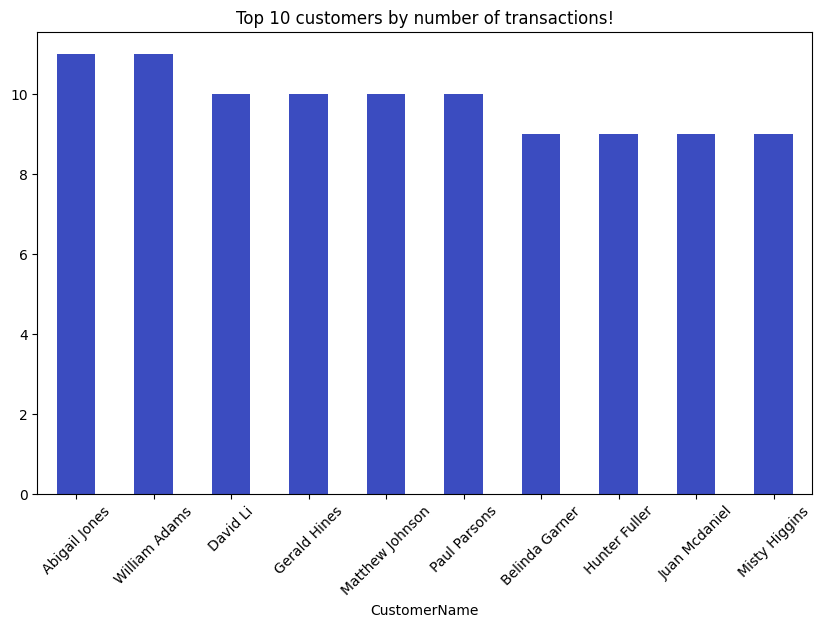

In [ ]:
merged_data.groupby('CustomerName')['TransactionID'].count().nlargest(10).plot(
    kind='bar',
    figsize=(10, 6),
    title='Top 10 customers by number of transactions!',
    colormap='coolwarm'
)

plt.xticks(rotation=45)
plt.show()

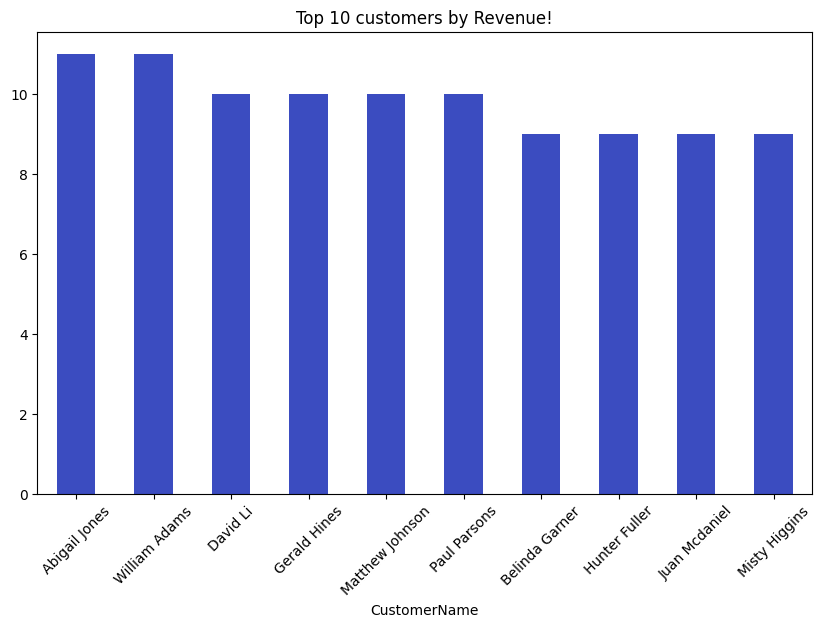

In [ ]:
merged_data.groupby('CustomerName')['TotalValue'].count().nlargest(10).plot(
    kind='bar',
    figsize=(10, 6),
    title='Top 10 customers by Revenue!',
    colormap='coolwarm'
)

plt.xticks(rotation=45)
plt.show()

## TotalValue Distribution

Let us see how the 'TotalValue' attribute is distrubuted.

In [ ]:
merged_data['TotalValue'].describe()

,TotalValue
count,1000.000000
mean,689.995560
std,493.144478
min,16.080000
25%,295.295000
50%,588.880000
75%,1011.660000
max,1991.040000


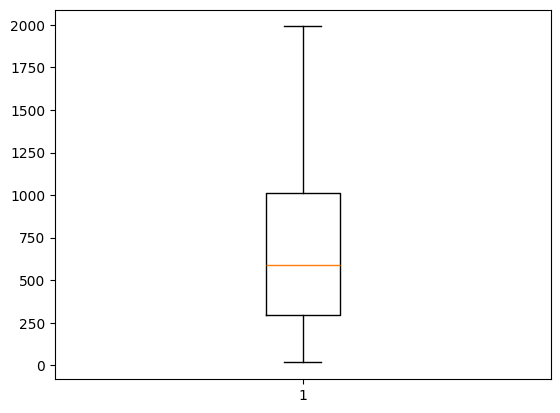

In [ ]:
plt.boxplot('TotalValue', data = merged_data)
plt.show()

The average transaction value is $689.99, and there are no outliers, this indicates a preference for premium products.


## TotalValue Distribution by Category

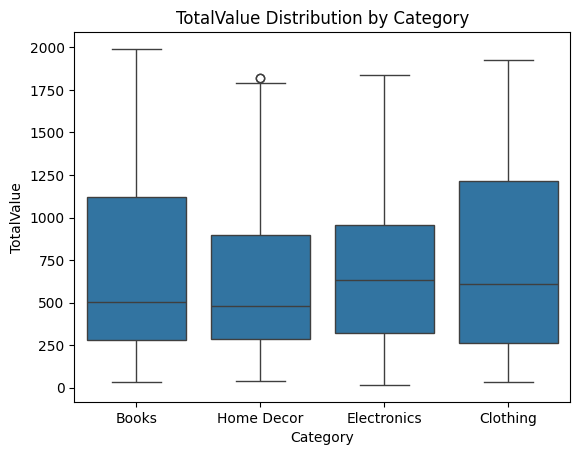

In [ ]:
sns.boxplot(x='Category', y='TotalValue', data=merged_data)
plt.title('TotalValue Distribution by Category')
plt.xlabel('Category')
plt.ylabel('TotalValue')
plt.show()